# <center> Assignment 2: HR Analytics - Job Change of Data Scientists </center>

## Data

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

- The dataset is imbalanced.
- Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
- Missing imputation can be a part of your pipeline as well.

Ref: [HR Analytics - Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)
**Data Descriptions**:

|Features|Descriptions
|-|-|
|enrollee_id| Unique ID for candidate|
|city| City code|
|city_ development _index| Developement index of the city (scaled)|
|gender| Gender of candidate|
|relevent_experience| Relevant experience of candidate|
|enrolled_university| Type of University course enrolled if any|
|education_level| Education level of candidate|
|major_discipline|Education major discipline of candidate|
|experience| Candidate total experience in years|
|company_size| No of employees in current employer's company|
|company_type| Type of current employer|
|lastnewjob| Difference in years between previous job and current job|
|training_hours| training hours completed|
|target| 0 – Not looking for job change, 1 – Looking for a job change|

**Train test split 80/20 random_state 42,KPI: f1-score - 0.75**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(30)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
data.isna().sum()*100/len(data)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

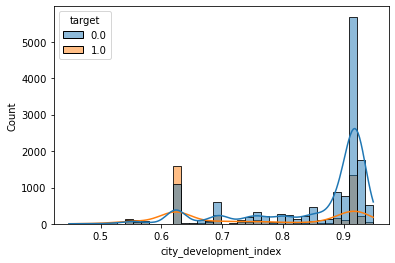

In [6]:
## sự phát triển của thành phố hưởng đến sự thay đổi cv ntn?
sns.histplot(data=data, x= 'city_development_index' , hue= 'target', kde = True)
plt.show()

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

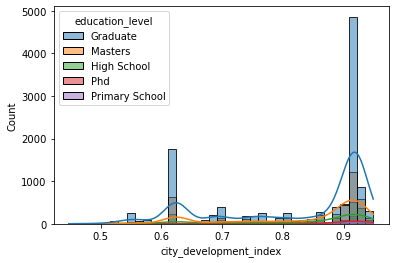

In [7]:
sns.histplot(data=data, x= 'city_development_index' , hue= 'education_level', kde = True)

In [8]:
data.city_development_index.describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [9]:
#city_index_groups = [0.4,0.5,0.6,0.7,0.8,0.9,1]
data['city_index_groups']= pd.cut(data.city_development_index, bins=[0.4,0.5,0.6,0.7,0.8,0.9,1])
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_index_groups
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,"(0.9, 1.0]"
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,"(0.7, 0.8]"
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,"(0.6, 0.7]"
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,"(0.7, 0.8]"
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,"(0.7, 0.8]"


### Education_level

In [10]:
data.groupby(['city_index_groups','relevent_experience']).education_level.agg([len, 'count', lambda x: (x.isnull().sum())])

len  count  <lambda_0>
city_index_groups relevent_experience                             
(0.4, 0.5]        Has relevent experience    29     26           3
                  No relevent experience     34     30           4
(0.5, 0.6]        Has relevent experience   436    425          11
                  No relevent experience    226    218           8
(0.6, 0.7]        Has relevent experience  2574   2521          53
                  No relevent experience   1257   1182          75
(0.7, 0.8]        Has relevent experience  1023   1012          11
                  No relevent experience    387    370          17
(0.8, 0.9]        Has relevent experience  2608   2562          46
                  No relevent experience    941    900          41
(0.9, 1.0]        Has relevent experience  7122   7035          87
                  No relevent experience   2521   2417         104

In [11]:
data.groupby(['city_index_groups','relevent_experience','education_level'])['education_level'].count()

city_index_groups  relevent_experience      education_level
(0.4, 0.5]         Has relevent experience  Graduate             15
                                            High School           2
                                            Masters               4
                                            Phd                   4
                                            Primary School        1
                   No relevent experience   Graduate             18
                                            High School           6
                                            Masters               4
                                            Phd                   0
                                            Primary School        2
(0.5, 0.6]         Has relevent experience  Graduate            341
                                            High School          18
                                            Masters              62
                                            Phd         

In [12]:
data.education_level.isna().sum()

460

In [13]:
ser = data.groupby(['city_index_groups','relevent_experience']).education_level.apply(lambda x: x.fillna(x.mode()[0]))
data['education_level'] = ser
data.education_level.isna().sum()

0

# Gender

In [14]:
data.gender.value_counts(dropna = False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [15]:
data.groupby(['education_level','gender'],dropna= False).gender.agg(len)

education_level  gender
Graduate         Female     781
                 Male      8386
                 Other      121
                 NaN       2770
High School      Female      67
                 Male      1395
                 Other       33
                 NaN        522
Masters          Female     339
                 Male      2957
                 Other       27
                 NaN       1038
Phd              Female      47
                 Male       280
                 Other        4
                 NaN         83
Primary School   Female       4
                 Male       203
                 Other        6
                 NaN         95
Name: gender, dtype: int64

In [16]:
ser1 = data.groupby(['education_level']).gender.apply(lambda x: x.fillna(x.mode()[0]))
data['gender'] = ser1
data.gender.isna().sum()

0

# Tổng Kinh nghiệm

In [17]:
data.groupby(['relevent_experience','experience']).experience.count()

relevent_experience      experience
Has relevent experience  1              190
                         10             810
                         11             564
                         12             433
                         13             344
                         14             499
                         15             587
                         16             456
                         17             314
                         18             253
                         19             264
                         2              435
                         20             132
                         3              645
                         4              805
                         5              920
                         6              883
                         7              758
                         8              631
                         9              778
                         <1             164
                         >20           2

In [18]:
ser2 = data.groupby(['relevent_experience']).experience.apply(lambda x: x.fillna(x.mode()[0]))
data['experience'] = ser2
data.experience.isnull().sum()

0

### enrolled_university

In [19]:
data.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [20]:
data.groupby(['education_level','enrolled_university']).enrolled_university.count()

education_level  enrolled_university
Graduate         Full time course       2278
                 Part time course        805
                 no_enrollment          8704
High School      Full time course        864
                 Part time course        166
                 no_enrollment           940
Masters          Full time course        557
                 Part time course        204
                 no_enrollment          3547
Phd              Full time course         25
                 Part time course         12
                 no_enrollment           371
Primary School   Full time course         33
                 Part time course         11
                 no_enrollment           255
Name: enrolled_university, dtype: int64

In [21]:
ser3 = data.groupby(['education_level']).enrolled_university.apply(lambda x: x.fillna(x.mode()[0]))
data['enrolled_university'] = ser3
data.enrolled_university.isna().sum()

0

In [22]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
city_index_groups            0
dtype: int64

### Company_type

In [23]:
data.company_type.value_counts(dropna = False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

##### Dữ liệu bị mất cân bằng bởi giá trị "Pvt Ltd" quá lớn, nếu dùng fillna bởi mode() sẽ không khách quan

In [24]:
ser4 = data.company_type.fillna("Unknown")
data['company_type'] = ser4
data.company_type.isna().sum()

0

### Company_Size

In [25]:
data.company_size.value_counts(dropna = False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [26]:
#data['company_size'] = data['company_size'].astype(str).str.replace('/','-' ).str.replace('<10','0-10').head(50)
ser5 = data.groupby(['training_hours','company_type']).company_size.apply(lambda x: 
                                                                   x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
data['company_size']= ser5
data.company_size.value_counts(dropna=False)

50-99        5414
100-500      4027
10/49        2491
10000+       2308
1000-4999    1550
<10          1386
500-999       945
5000-9999     676
NaN           361
Name: company_size, dtype: int64

In [27]:
ser6 = data.company_size.mode()[0]
ser6 = data.company_size.fillna(ser6)
data.company_size= ser6
data.company_size.isna().sum()

0

### Major_discipline

In [28]:
data2 = data.groupby(['experience', 'relevent_experience','major_discipline']).major_discipline.count()
data2.tail(50)
# dữ liệu bị mất cân bằng bởi "STEM" quá lớn nếu dùng Mode() sẽ không khách quan. Hơn nữa tư duy rằng nếu có học thì 
# ứng viên đã liệt kê -> với những trường hợp không liệt kê sẽ điền vào giá trị "Unknown"
ser7 = data.major_discipline.fillna("Unknown")
data['major_discipline'] = ser7
data.major_discipline.isna().sum()

0

### last_new_job

In [29]:
data.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [31]:
ser8 = data.groupby(['education_level','relevent_experience','target']).last_new_job.apply(lambda x: x.fillna(x.mode()[0]))
data['last_new_job'] = ser8
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
city_index_groups         0
dtype: int64

### Hoàn thành Fill missing value 